#**Introduction** 

  In this project I have provided with a dataset called HSB(High School and Beyond). In this dataset there are several records of students with their id , gender , race , ses (Socioeconomic Status) , schtyp (School type) , prog (Program type) , scores in reading , writing , math , science , Social studies.
 
 Two hundred observations were randomly sampled from the High School and Beyond survey, a survey conducted on high school seniors by the National Center of Education Statistics.

# **Aim of the project**

Firstly , I need to do some basic exploration of the data. Then I need to create a machine learning model(supervised learning) to predict the "prog" (Program type). Here, there are three possibilities for the program: vocation, academic, and general. I need to find the appropriate model for this dataset.

Since this problem is not binary classification so we can not use logistic regression here. 
we can use the following models:

*   KNN Algorithm
*   Decision Tree Algorithm
*   Ramdom Forest Algorithm
*   Support Vector Machine
*   XGBoost 



# **Importing the libraries and modules**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree

# **Reading the dataset**

In [2]:
data = pd.read_csv("/content/hsb2.csv")
data1=data.copy()

# **Basic exploration**

In [3]:
data1.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [4]:
data1.shape

(200, 11)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   gender   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [6]:
data1.describe()

,id,read,write,math,science,socst
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775000,52.645000,51.850000,52.405000
std,57.879185,10.252937,9.478586,9.368448,9.900891,10.735793
min,1.000000,28.000000,31.000000,33.000000,26.000000,26.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000,46.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000,52.000000
75%,150.250000,60.000000,60.000000,59.000000,58.000000,61.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000,71.000000


In [7]:
# id column is of no use so I am dropping the id column
data1.drop(columns=["id"],inplace = True)
data1.head()

,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,male,white,low,public,general,57,52,41,47,57
1,female,white,middle,public,vocational,68,59,53,63,61
2,male,white,high,public,general,44,33,54,58,31
3,male,white,high,public,vocational,63,44,47,53,56
4,male,white,middle,public,academic,47,52,57,53,61


## Checking missing values

In [8]:
data1.isnull().sum()   # it will show the total number of missing values in each column

gender     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64

Here in the dataset there is no missing values.

In [9]:
data1["gender"].unique()   # This will show how many unique values are present in the gender column

array(['male', 'female'], dtype=object)

In [10]:
data1["race"].unique()   # This will show how many unique values are present in the race column

array(['white', 'african american', 'hispanic', 'asian'], dtype=object)

In [11]:
data1["ses"].unique()   # This will show how many unique values are present in the ses column

array(['low', 'middle', 'high'], dtype=object)

In [12]:
data1["schtyp"].unique()   # This will show how many unique values are present in the schtyp column

array(['public', 'private'], dtype=object)

In [13]:
data1["prog"].unique()   # This will show how many unique values are present in the prog column

array(['general', 'vocational', 'academic'], dtype=object)

As we have seen , the five categocal variables have no wrong entries.

## Checking outliers

In [14]:
cont_cols = ['read', 'write', 'math',
       'science', 'socst']


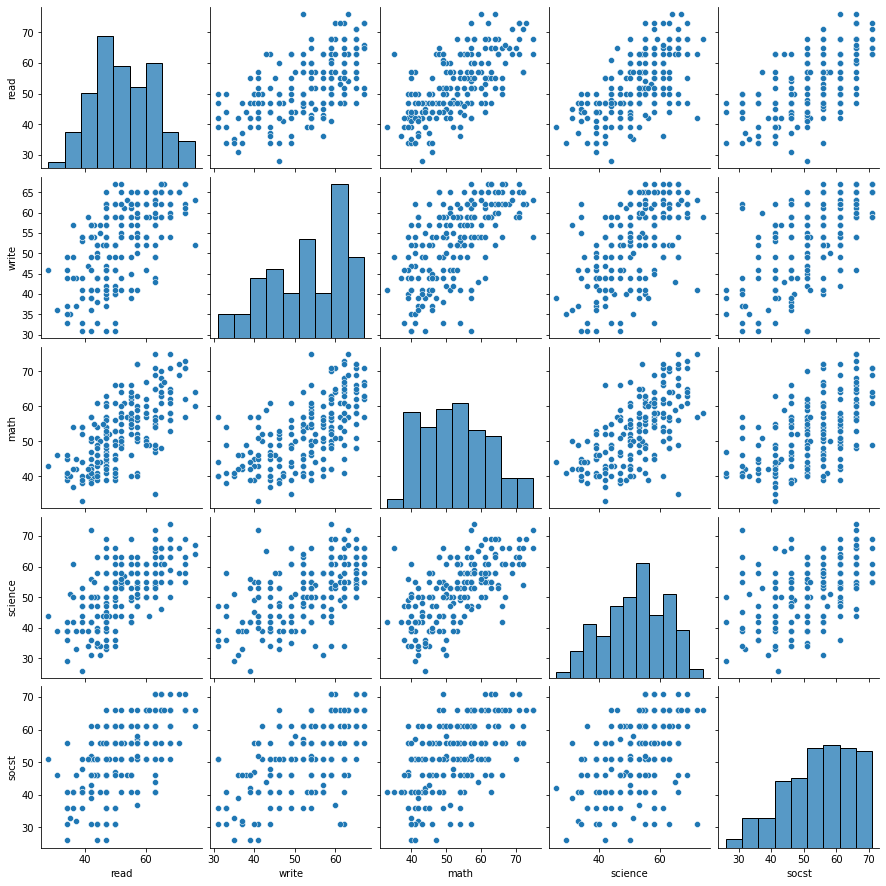

In [15]:
sns.pairplot(data1[cont_cols])

In [16]:
independent_features=data1.drop("prog",axis=1)

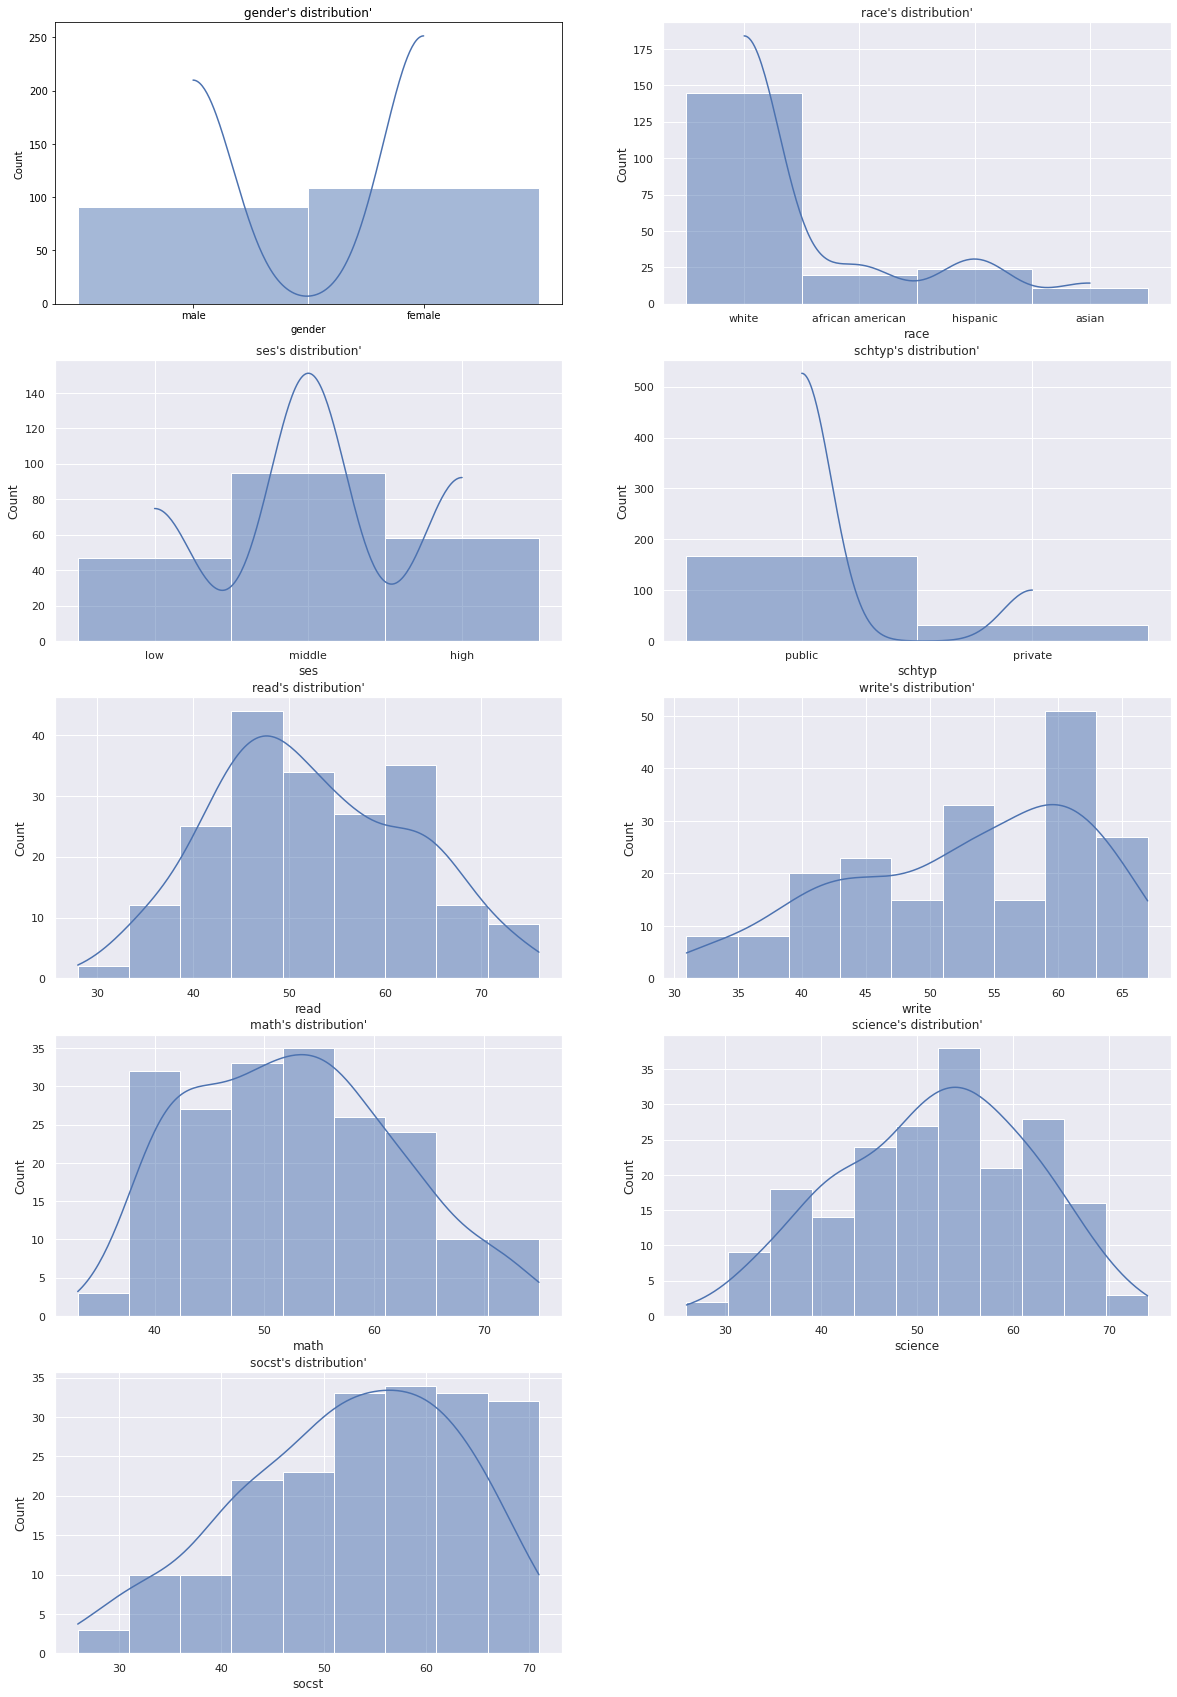

In [17]:
plt.figure(figsize=(20,30))
for i in enumerate(independent_features.columns):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=independent_features, x=i[1], kde=True)
  plt.title("{}'s distribution'".format(i[1]))

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prog', ylabel='count'>

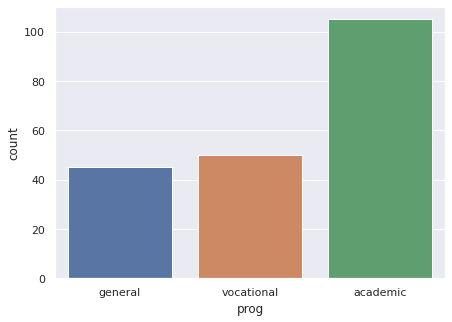

In [18]:
sns.countplot(data1["prog"])

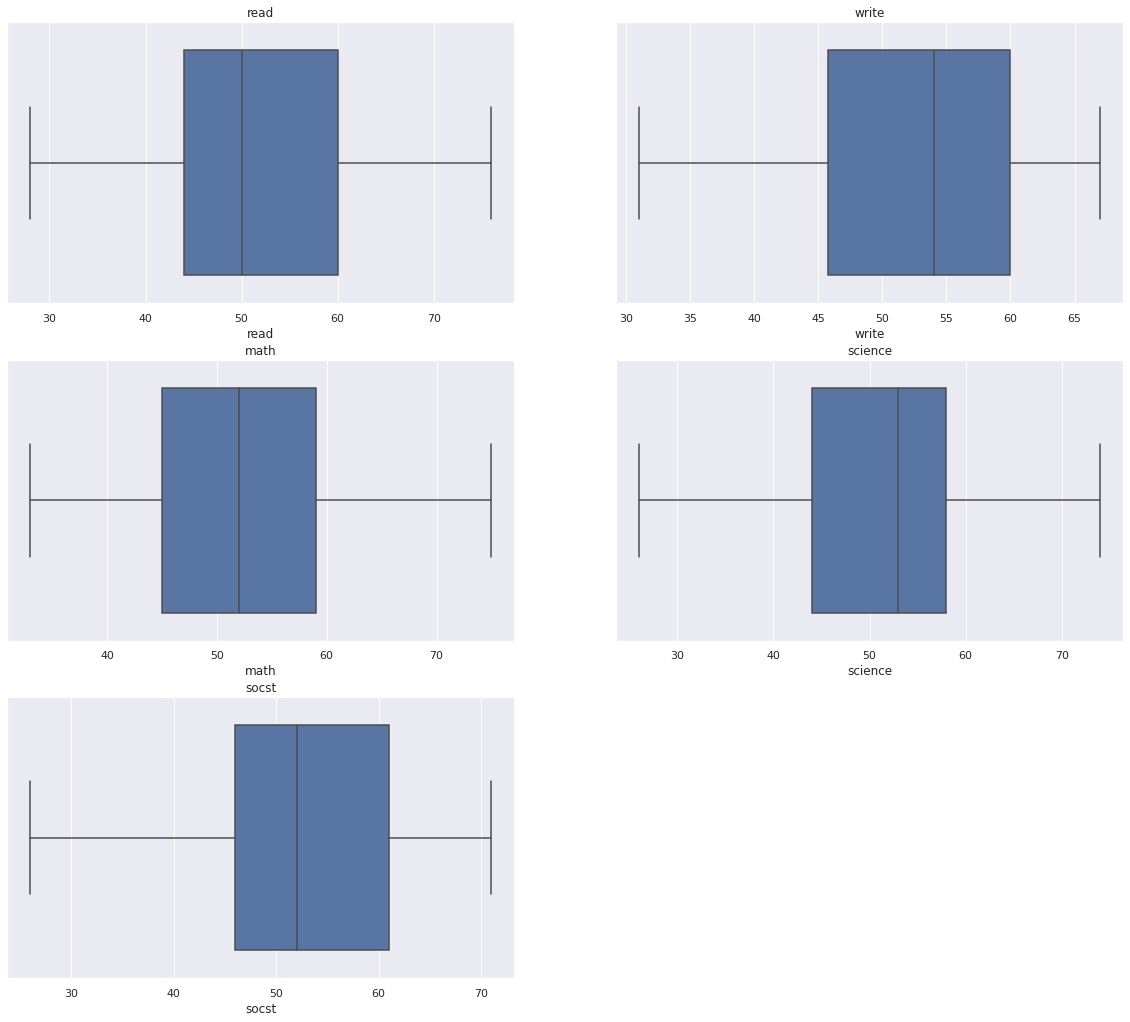

In [19]:
plt.figure(figsize=(20,30))
for i in enumerate(cont_cols):
  plt.subplot(5, 2, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.boxplot(data=data1, x=i[1])
  plt.title("{}".format(i[1]))

box plot shows there is no outlier present in the dataset. So we need to find the outliers using IQR.

In [20]:
for i in cont_cols:
  Q1 = data1[i].quantile(0.25)
  Q3 = data1[i].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  data1 = data1.loc[(data1[i] > lower_whisker) & (data1[i] < upper_whisker)]

In [21]:
data1.shape

(200, 10)

After removing outliers we can see the shape of the data remains same. So we can say that there is no outliers in the continuous features.

# **Encoding the categorical variables**

In [22]:
data2=pd.get_dummies(data1,columns=["gender","race","schtyp"])

In [23]:
data2=data2.drop(columns=["gender_male","race_white","schtyp_private"])
data2

,ses,prog,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
0,low,general,57,52,41,47,57,0,0,0,0,1
1,middle,vocational,68,59,53,63,61,1,0,0,0,1
2,high,general,44,33,54,58,31,0,0,0,0,1
3,high,vocational,63,44,47,53,56,0,0,0,0,1
4,middle,academic,47,52,57,53,61,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,middle,general,55,59,52,42,56,1,0,1,0,0
196,middle,vocational,42,46,38,36,46,1,0,0,0,1
197,middle,general,57,41,57,55,52,1,0,0,0,0
198,middle,general,55,62,58,58,61,1,0,0,0,1


In [24]:
dic1={"low":1,"middle":2,"high":3}
data2["ses"]=data2["ses"].map(dic1)
data2

,ses,prog,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
0,1,general,57,52,41,47,57,0,0,0,0,1
1,2,vocational,68,59,53,63,61,1,0,0,0,1
2,3,general,44,33,54,58,31,0,0,0,0,1
3,3,vocational,63,44,47,53,56,0,0,0,0,1
4,2,academic,47,52,57,53,61,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,general,55,59,52,42,56,1,0,1,0,0
196,2,vocational,42,46,38,36,46,1,0,0,0,1
197,2,general,57,41,57,55,52,1,0,0,0,0
198,2,general,55,62,58,58,61,1,0,0,0,1


In [25]:
# Create an instance of the LabelEncoder class
encoder = LabelEncoder()


prog_encoded = encoder.fit_transform(data2["prog"])
prog_encoded

array([1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1,
       1, 0])

In [26]:
data2["prog_encoded"]=prog_encoded
data2.head()

,ses,prog,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public,prog_encoded
0,1,general,57,52,41,47,57,0,0,0,0,1,1
1,2,vocational,68,59,53,63,61,1,0,0,0,1,2
2,3,general,44,33,54,58,31,0,0,0,0,1,1
3,3,vocational,63,44,47,53,56,0,0,0,0,1,2
4,2,academic,47,52,57,53,61,0,0,0,0,1,0


In [27]:
# dropping prog column and creating our final dataset
data_final=data2.drop(columns=["prog"],axis=1)
data_final.head()

,ses,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public,prog_encoded
0,1,57,52,41,47,57,0,0,0,0,1,1
1,2,68,59,53,63,61,1,0,0,0,1,2
2,3,44,33,54,58,31,0,0,0,0,1,1
3,3,63,44,47,53,56,0,0,0,0,1,2
4,2,47,52,57,53,61,0,0,0,0,1,0


# **Train Test Split**

In [188]:
#Extracting Independent and dependent Variable  
X=data_final.iloc[:,:-1]
y=data_final.iloc[:,-1]

In [189]:
X.head()

,ses,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
0,1,57,52,41,47,57,0,0,0,0,1
1,2,68,59,53,63,61,1,0,0,0,1
2,3,44,33,54,58,31,0,0,0,0,1
3,3,63,44,47,53,56,0,0,0,0,1
4,2,47,52,57,53,61,0,0,0,0,1


In [190]:
y.head()

0    1
1    2
2    1
3    2
4    0
Name: prog_encoded, dtype: int64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
X_train.head()

,ses,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
88,2,50,31,40,34,31,0,0,0,0,1
58,2,63,57,55,58,41,0,0,0,0,0
113,1,68,65,58,59,56,1,0,0,0,1
149,1,45,55,44,34,41,1,1,0,0,1
36,2,68,54,75,66,66,0,0,0,0,0


# **Feature Scaling**

In [192]:
scaler=StandardScaler()

X_train[cont_cols]=scaler.fit_transform(X_train[cont_cols])

X_test[cont_cols]=scaler.transform(X_test[cont_cols])

In [193]:
X_train.head()

,ses,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
88,2,-0.212647,-2.336187,-1.343229,-1.720653,-1.992631,0,0,0,0,1
58,2,1.047996,0.462010,0.246839,0.599329,-1.055552,0,0,0,0,0
113,1,1.532859,1.322994,0.564853,0.695995,0.350066,1,0,0,0,1
149,1,-0.697510,0.246764,-0.919211,-1.720653,-1.055552,1,1,0,0,1
36,2,1.532859,0.139141,2.366930,1.372656,1.287144,0,0,0,0,0


In [194]:
X_test.head()


,ses,read,write,math,science,socst,gender_female,race_african american,race_asian,race_hispanic,schtyp_public
86,3,-0.018702,-1.259957,-0.177179,0.115999,0.350066,0,0,0,0,1
120,1,0.757079,0.139141,-0.283184,-0.173999,-0.118473,1,0,0,1,0
22,2,-0.212647,-1.367580,-0.813206,0.309331,0.350066,0,1,0,0,1
11,2,0.466161,1.322994,-0.177179,1.082658,0.818605,0,0,0,0,1
195,2,0.272216,0.677256,-0.071174,-0.947326,0.350066,1,0,1,0,0


# **Creating Models**

In [195]:
# Creating a Matrix to compare the accuracy of the models.
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([8,2]), columns=["Accuracy_Score(Train)","Accuracy_Score(Test)"])
Model_Evaluation_Comparison_Matrix

,Accuracy_Score(Train),Accuracy_Score(Test)
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0


## KNN

In [196]:
classifier_KNN= KNeighborsClassifier()  
classifier_KNN.fit(X_train, y_train) 

KNeighborsClassifier()

In [197]:
#Predicting the test set result  
y_pred= classifier_KNN.predict(X_test)  

In [198]:
y_pred

array([0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0])

In [199]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(f"KNN training set accuracy: {format(classifier_KNN.score(X_train, y_train), '.4f')} ")
print(f"KNN testing set accuracy: {format(classifier_KNN.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[24  3  4]
 [ 9  1  5]
 [ 6  2  6]]
KNN training set accuracy: 0.6857 
KNN testing set accuracy: 0.5167 
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        31
           1       0.17      0.07      0.10        15
           2       0.40      0.43      0.41        14

    accuracy                           0.52        60
   macro avg       0.39      0.42      0.40        60
weighted avg       0.45      0.52      0.47        60



In [200]:
Model_Evaluation_Comparison_Matrix.loc[0,'Accuracy_Score(Train)']  = float(format(classifier_KNN.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[0,'Accuracy_Score(Test)']   =float(format(classifier_KNN.score(X_test, y_test), '.4f'))

## Decision Tree Algorithm

In [201]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train) 

DecisionTreeClassifier()

In [202]:
#Predicting the test set result  
y_pred= classifier_DT.predict(X_test) 

In [203]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [204]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"Decision tree training set accuracy: {format(classifier_DT.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classifier_DT.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[25  4  2]
 [ 8  6  1]
 [ 3  4  7]]
Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.6333 
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        31
           1       0.43      0.40      0.41        15
           2       0.70      0.50      0.58        14

    accuracy                           0.63        60
   macro avg       0.61      0.57      0.58        60
weighted avg       0.63      0.63      0.63        60



In [205]:
Model_Evaluation_Comparison_Matrix.loc[1,'Accuracy_Score(Train)']  = float(format(classifier_DT.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[1,'Accuracy_Score(Test)']   =float(format(classifier_DT.score(X_test, y_test), '.4f'))

## Random Forest Algorithm

In [206]:
classifier_RF= RandomForestClassifier()  
classifier_RF.fit(X_train, y_train) 

RandomForestClassifier()

In [207]:
#Predicting the test set result  
y_pred= classifier_RF.predict(X_test) 

In [208]:
y_pred

array([0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0])

In [209]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"Random Forest training set accuracy: {format(classifier_RF.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier_RF.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[24  3  4]
 [11  1  3]
 [ 5  3  6]]
Random Forest training set accuracy: 1.0000 
Random Forest testing set accuracy: 0.5167 
              precision    recall  f1-score   support

           0       0.60      0.77      0.68        31
           1       0.14      0.07      0.09        15
           2       0.46      0.43      0.44        14

    accuracy                           0.52        60
   macro avg       0.40      0.42      0.40        60
weighted avg       0.45      0.52      0.48        60



In [210]:
Model_Evaluation_Comparison_Matrix.loc[2,'Accuracy_Score(Train)']  = float(format(classifier_RF.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[2,'Accuracy_Score(Test)']   =float(format(classifier_RF.score(X_test, y_test), '.4f'))

###Hyper Parameter Tuning for Random Forest

In [213]:
param_grid_RF = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
  
grid = GridSearchCV(classifier_RF, param_grid_RF, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.571 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.643 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.536 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.643 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.571 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.500 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.643 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=sqr

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=3)

In [214]:
# print best parameter after tuning
print(grid.best_params_)

{'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 6, 'n_estimators': 25}


### Running Random Forest Model after Hyper Parameter Tuning

In [215]:
classifier_RF_tuned = RandomForestClassifier(max_depth=3, max_features="log2", max_leaf_nodes=6,
                       n_estimators=25)
classifier_RF_tuned.fit(X_train, y_train) 


RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=6,
                       n_estimators=25)

In [216]:
#Predicting the test set result  
y_pred= classifier_RF_tuned.predict(X_test) 

In [217]:
y_pred

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [218]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"Random Forest training set accuracy: {format(classifier_RF_tuned.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier_RF_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[31  0  0]
 [12  1  2]
 [ 7  0  7]]
Random Forest training set accuracy: 0.7000 
Random Forest testing set accuracy: 0.6500 
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        31
           1       1.00      0.07      0.12        15
           2       0.78      0.50      0.61        14

    accuracy                           0.65        60
   macro avg       0.80      0.52      0.50        60
weighted avg       0.75      0.65      0.57        60



In [219]:
Model_Evaluation_Comparison_Matrix.loc[3,'Accuracy_Score(Train)']  = float(format(classifier_RF_tuned.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[3,'Accuracy_Score(Test)']   =float(format(classifier_RF_tuned.score(X_test, y_test), '.4f'))

## Support Vector Machine

In [220]:
classifier_SVM = svm.SVC()
classifier_SVM.fit(X_train, y_train) 

SVC()

In [221]:
#Predicting the test set result  
y_pred= classifier_SVM.predict(X_test) 

In [222]:
y_pred

array([0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [223]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"SVM training set accuracy: {format(classifier_SVM.score(X_train, y_train), '.4f')} ")
print(f"SVM testing set accuracy: {format(classifier_SVM.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[29  0  2]
 [12  0  3]
 [ 4  1  9]]
SVM training set accuracy: 0.6786 
SVM testing set accuracy: 0.6333 
              precision    recall  f1-score   support

           0       0.64      0.94      0.76        31
           1       0.00      0.00      0.00        15
           2       0.64      0.64      0.64        14

    accuracy                           0.63        60
   macro avg       0.43      0.53      0.47        60
weighted avg       0.48      0.63      0.54        60



In [224]:
Model_Evaluation_Comparison_Matrix.loc[4,'Accuracy_Score(Train)']  = float(format(classifier_SVM.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[4,'Accuracy_Score(Test)']   =float(format(classifier_SVM.score(X_test, y_test), '.4f'))

###Hyper Parameter Tuning for SVM

In [225]:
param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['linear', 'poly', 'rbf']} 
  
grid = GridSearchCV(classifier_SVM, param_grid_SVM, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.571 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.571 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.643 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.429 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.571 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.607 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [226]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


### Running SVM Model after Hyper Parameter Tuning

In [227]:
classifier_SVM_tuned = svm.SVC(C= 1, gamma=1, kernel= 'linear')
classifier_SVM_tuned.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [228]:
y_pred = classifier_SVM_tuned.predict(X_test)

In [229]:
y_pred

array([2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [230]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"SVM training set accuracy: {format(classifier_SVM_tuned.score(X_train, y_train), '.4f')} ")
print(f"SVM testing set accuracy: {format(classifier_SVM_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[27  1  3]
 [11  0  4]
 [ 4  1  9]]
SVM training set accuracy: 0.6786 
SVM testing set accuracy: 0.6000 
              precision    recall  f1-score   support

           0       0.64      0.87      0.74        31
           1       0.00      0.00      0.00        15
           2       0.56      0.64      0.60        14

    accuracy                           0.60        60
   macro avg       0.40      0.50      0.45        60
weighted avg       0.46      0.60      0.52        60



In [231]:
Model_Evaluation_Comparison_Matrix.loc[5,'Accuracy_Score(Train)']  = float(format(classifier_SVM_tuned.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[5,'Accuracy_Score(Test)']   =float(format(classifier_SVM_tuned.score(X_test, y_test), '.4f'))

## XGBoost

In [232]:
# we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [233]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [234]:
y_pred=classifier_XGB.predict(X_test)

In [235]:
y_pred

array([0, 0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [236]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"XGBoost training set accuracy: {format(classifier_XGB.score(X_train, y_train), '.4f')} ")
print(f"XGBoost testing set accuracy: {format(classifier_XGB.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[24  3  4]
 [10  2  3]
 [ 6  2  6]]
XGBoost training set accuracy: 1.0000 
XGBoost testing set accuracy: 0.5333 
              precision    recall  f1-score   support

           0       0.60      0.77      0.68        31
           1       0.29      0.13      0.18        15
           2       0.46      0.43      0.44        14

    accuracy                           0.53        60
   macro avg       0.45      0.45      0.43        60
weighted avg       0.49      0.53      0.50        60



In [237]:
Model_Evaluation_Comparison_Matrix.loc[6,'Accuracy_Score(Train)']  = float(format(classifier_XGB.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[6,'Accuracy_Score(Test)']   =float(format(classifier_XGB.score(X_test, y_test), '.4f'))

###Hyper Parameter Tuning for XGBoost


In [238]:
param_grid_XGB = {'learning_rate': [0.1,0.2,0.3,0.4,0.5], 
              'colsample_bytree': [0.3],
              'objective' : ['reg:linear'],
              'max_depth':[1,2,3,4,5],
              'n_estimators':[20,40,60,80,100],
              'alpha':[10]} 
  
grid = GridSearchCV(classifier_XGB, param_grid_XGB, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=20, objective=reg:linear;, score=0.500 total time=   0.0s
[CV 2/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=20, objective=reg:linear;, score=0.536 total time=   0.0s
[CV 3/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=20, objective=reg:linear;, score=0.536 total time=   0.0s
[CV 4/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=20, objective=reg:linear;, score=0.536 total time=   0.0s
[CV 5/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=20, objective=reg:linear;, score=0.536 total time=   0.0s
[CV 1/5] END alpha=10, colsample_bytree=0.3, learning_rate=0.1, max_depth=1, n_estimators=40, objective=reg:linear;, score=0.500 total time=   0.0s
[CV 2/5] END alpha=10, colsample_bytree=0.3, lear

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'alpha': [10], 'colsample_bytree': [0.3],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'objective': ['reg:linear']},
             verbose=3)

In [239]:
# print best parameter after tuning
print(grid.best_params_)

{'alpha': 10, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20, 'objective': 'reg:linear'}


### Running SVM Model after Hyper Parameter Tuning

In [240]:
classifier_XGB_tuned = XGBClassifier(alpha=10, colsample_bytree= 0.3, learning_rate= 0.1,max_depth= 1,
                               n_estimators= 20,objective= 'reg:linear')
classifier_XGB_tuned.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [241]:
y_pred = classifier_XGB_tuned.predict(X_test)

In [242]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [243]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
print(f"XGBoost training set accuracy: {format(classifier_XGB_tuned.score(X_train, y_train), '.4f')} ")
print(f"XGBoost testing set accuracy: {format(classifier_XGB_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred))

[[31  0  0]
 [15  0  0]
 [14  0  0]]
XGBoost training set accuracy: 0.5286 
XGBoost testing set accuracy: 0.5167 
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        31
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        14

    accuracy                           0.52        60
   macro avg       0.17      0.33      0.23        60
weighted avg       0.27      0.52      0.35        60



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
Model_Evaluation_Comparison_Matrix.loc[7,'Accuracy_Score(Train)']  = float(format(classifier_XGB_tuned.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[7,'Accuracy_Score(Test)']   =float(format(classifier_XGB_tuned.score(X_test, y_test), '.4f'))

In [245]:
Model_Evaluation_Comparison_Matrix

,Accuracy_Score(Train),Accuracy_Score(Test)
0,0.6857,0.5167
1,1.0000,0.6333
2,1.0000,0.5167
3,0.7000,0.6500
4,0.6786,0.6333
5,0.6786,0.6000
6,1.0000,0.5333
7,0.5286,0.5167


In [246]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['KNN','Decision Tree','Random Forest','Random Forest(Tuned)',
             'SVM','SVM(Tuned)','XGBoost','XGBoost(Tuned)']
EMC

,Accuracy_Score(Train),Accuracy_Score(Test)
KNN,0.6857,0.5167
Decision Tree,1.0000,0.6333
Random Forest,1.0000,0.5167
Random Forest(Tuned),0.7000,0.6500
SVM,0.6786,0.6333
SVM(Tuned),0.6786,0.6000
XGBoost,1.0000,0.5333
XGBoost(Tuned),0.5286,0.5167


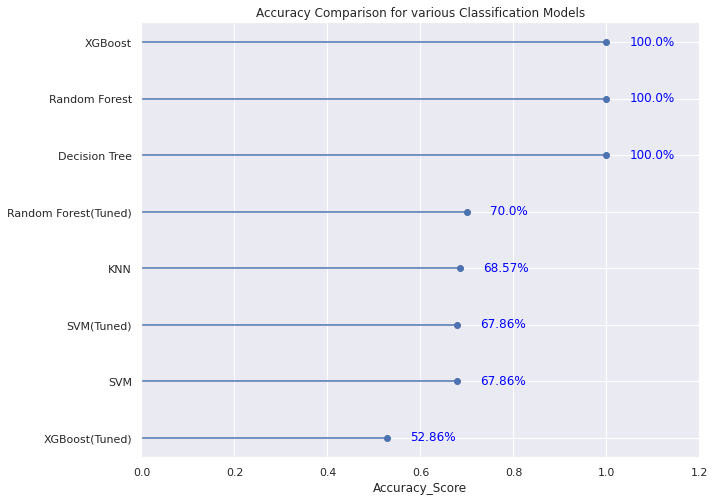

In [247]:
plt.figure(figsize=(10,8))

acc_train= EMC['Accuracy_Score(Train)'].sort_values(ascending=True)
plt.hlines(y=acc_train.index, xmin=0, xmax=acc_train.values)
plt.plot(acc_train.values, acc_train.index,'o')
plt.title('Accuracy Comparison for various Classification Models')
plt.xlabel('Accuracy_Score')

for i, v in enumerate(acc_train):
    plt.text(v+0.05, i-0.05, str(round(v*100,2))+"%", color='blue')
plt.xlim([0,1.2])
plt.show()

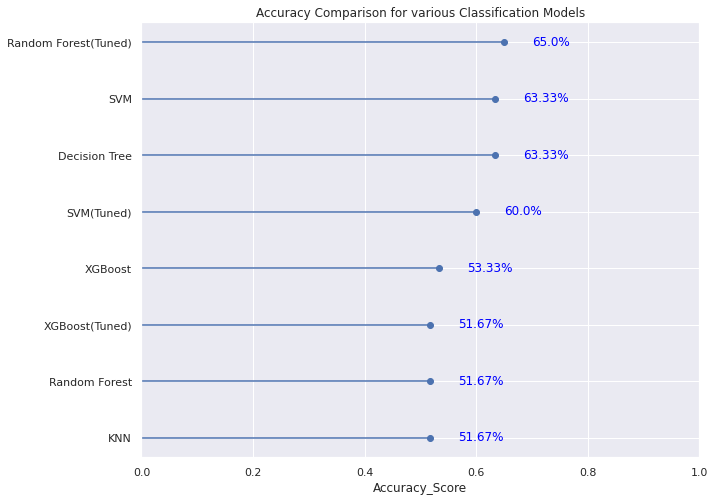

In [248]:
plt.figure(figsize=(10,8))

acc_test= EMC['Accuracy_Score(Test)'].sort_values(ascending=True)
plt.hlines(y=acc_test.index, xmin=0, xmax=acc_test.values)
plt.plot(acc_test.values, acc_test.index,'o')
plt.title('Accuracy Comparison for various Classification Models')
plt.xlabel('Accuracy_Score')

for i, v in enumerate(acc_test):
    plt.text(v+0.05, i-0.05, str(round(float(v)*100,2))+"%", color='blue')
plt.xlim([0,1])
plt.show()

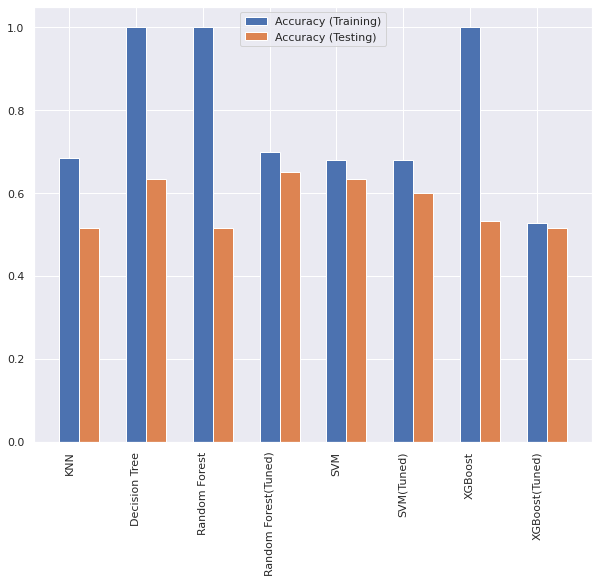

In [249]:
plt.figure(figsize=(10,8))
cc = Model_Evaluation_Comparison_Matrix.columns.values
plt.bar(np.arange(8), Model_Evaluation_Comparison_Matrix[cc[0]].values, width=0.3, label='Accuracy (Training)')
plt.bar(np.arange(8)+0.3, Model_Evaluation_Comparison_Matrix[cc[1]].values, width=0.3, label='Accuracy (Testing)')
plt.xticks(np.arange(8),EMC.index, rotation =90)
plt.legend()

plt.show()

# **Conclusion**

We can clearly see that Decision Tree, Random Forest and XGBoost are overfitted the model as all of these has 100% accuracy in the training dataset but less than 65% accuracy in case of testing dataset.

In case of XGBoost tuned, the model is best fitted but the accuracy is quite low in case of both training and testing dataset.

KNN and Random Forest tuned are also slightly over fitted the model.

So we are left with only two models, SVM and SVM tuned. Both have same accuracy in the training dataset but SVM tuned has slightly better accuracy in the testing dataset. So we can choose SVM after Hyper Parameter Tuning.